# `Predicting Bulldozers price using machine Learning` 🚜

# 1. Problem defination -
 * Predicting Bulldozer prices using previous prices and features
    
# 2. Data
 
   * This data is being collected from kaggle bluebook Bulldozer competition https://www.kaggle.com/c/bluebook-for-bulldozers/data`
   
# 3. Evaluation 
 
  
  * The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
   * https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
   
   * Goal is to minimize the error
   
   
# 4. Features

 * Many features available so provided google sheets link

https://docs.google.com/spreadsheets/d/1Br3Dl7Nt4-cnERKNQvHuaYEyrKJgGIKIWSUty3jI9HY/edit#gid=1030945251

# 5 . Modelling 

In [3]:
#importing all important libraries to analyse data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sklearn

In [5]:
workflow = """
 1. Problem Defination
 2. Collecting Data
 3. Evaluation of data
 4. Features
 5. Modelling 
 6. Experimentation

"""

In [6]:
data_feature = pd.read_csv('data/Data Dictionary.csv')

In [7]:
data_feature

,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


In [8]:
# Importing training and validation sets

df = pd.read_csv('data/TrainAndValid.csv',low_memory =False)

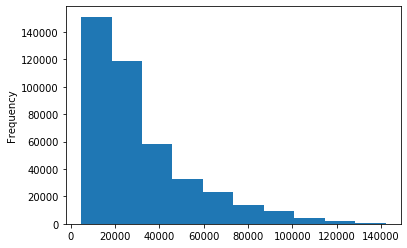

In [9]:
df.SalePrice.plot.hist()

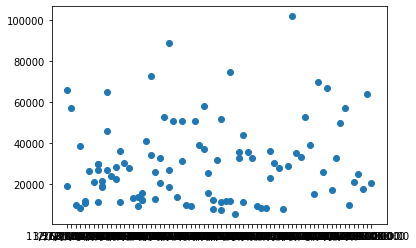

In [10]:
fig ,ax = plt.subplots()
ax.scatter(df.saledate[:100],df.SalePrice[:100])

In [11]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [12]:
# passing `parse_data` to convert sale date type which was object and now converting it to datetime format

df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

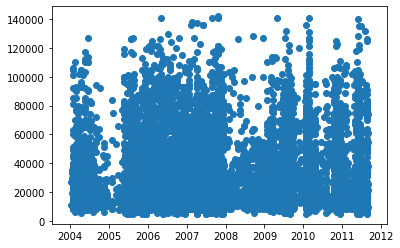

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[0:10000],df.SalePrice[:10000],cmap='YlGn')

In [16]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Sorting dataframe in order w.r.t to sale date for good reference


In [18]:
df.sort_values(by=['saledate'],
                inplace = True,
                ascending= True)
df.tail(1000).T

,410459,408415,408869,405925,410623,402581,402243,405211,402227,402261,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,6293060,6275845,6280928,6257932,6299445,4251097,1227453,4371097,1227381,1227527,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,54000,82500,68200,30000,32500,15500,10250,6500,17000,32000,...,35000,7500,13000,53000,39000,16000,6000,16000,55000,34000
MachineID,1901931,609945,461172,1797650,1858624,2003126,1064858,2278858,1031756,1032292,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,15310,1269,12709,3264,26126,3190,20523,9550,4604,14303,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,149,149,149,149,149,172,121,172,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,1,1,99,1,1,1,3,1,3,3,...,99,99,99,99,99,99,99,99,99,99
YearMade,2002,2005,2008,2000,2001,2000,2006,1997,2000,2008,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,1730,NaN,NaN,9001,1268,3640,5156,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,Medium,NaN,NaN,High,Low,Medium,Medium,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2012-04-11 00:00:00,2012-04-11 00:00:00,2012-04-11 00:00:00,2012-04-11 00:00:00,2012-04-11 00:00:00,2012-04-12 00:00:00,2012-04-12 00:00:00,2012-04-12 00:00:00,2012-04-12 00:00:00,2012-04-12 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [19]:
#keeping a original copy of dataframe

df_original = df.copy()

In [20]:
#Done some feature enginnering to enhance date month year out of saledate column
df['saleYear'] = df.saledate.dt.year
df['saleMonth'] = df.saledate.dt.month
df['saleday']  = df.saledate.dt.day
df['saleDayofWeek'] = df.saledate.dt.dayofweek
df['saleDayofYear'] = df.saledate.dt.dayofyear

In [22]:
#removed saledate column from dataframe
df.drop('saledate',axis =1,inplace = True)

In [23]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleday,saleDayofWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [24]:
for label ,content in df.items() :
    if pd.api.types.is_string_dtype(content) :
        df[label] = content.astype('category').cat.as_ordered()

In [25]:
df = df_original.copy()

In [145]:
#Done some feature enginnering to enhance date month year out of saledate column
df['saleYear'] = df.saledate.dt.year
df['saleMonth'] = df.saledate.dt.month
df['saleday']  = df.saledate.dt.day
df['saleDayofWeek'] = df.saledate.dt.dayofweek
df['saleDayofYear'] = df.saledate.dt.dayofyear

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [27]:
for label ,content in df.items() :
    if pd.api.types.is_string_dtype(content) :
        df[label] = content.astype('category').cat.as_ordered()

In [28]:
df.drop('saledate',axis=1,inplace=True)

In [29]:
df.head().dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [30]:
df.state[40000:50000]

162831    South Carolina
241602    South Carolina
55188     South Carolina
26630     South Carolina
92953     South Carolina
               ...      
261096            Nevada
88259              Maine
141772        New Mexico
77768             Nevada
145671            Nevada
Name: state, Length: 10000, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [31]:
df.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

# Save Preprocessed data

In [32]:
# Save preprocessed data
df.to_csv('data/df_tmp.csv',index=False)      #df_tmp -- dataframe temporary

In [33]:
#import back the preprocessed data
df_tmp = pd.read_csv('data/df_tmp.csv',low_memory=False)

In [34]:
for label ,content in df_tmp.items() :
    
    if pd.api.types.is_string_dtype(content) :
        
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [146]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_was_missing,Stick_Length_was_missing,Thumb_was_missing,Pattern_Changer_was_missing,Grouser_Type_was_missing,Backhoe_Mounting_was_missing,Blade_Type_was_missing,Travel_Controls_was_missing,Differential_Type_was_missing,Steering_Controls_was_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True


In [36]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [37]:
df_tmp.to_csv('data/train_tmp.csv',index=False)

In [38]:
train_tmp = pd.read_csv('data/train_tmp.csv',low_memory=False)

In [39]:
train_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [40]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# Filling missing values 

# 1.filling numeric values first

In [148]:
df_tmp = df_original.copy()

df_tmp.isna().sum()
df_tmp['saleYear'] = df_tmp.saledate.dt.year  
df_tmp['saleMonth'] = df_tmp.saledate.dt.month  
df_tmp['saleday']  = df_tmp.saledate.dt.day  
df_tmp['saleDayofWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayofYear'] = df_tmp.saledate.dt.dayofyear
    
df_tmp.drop('saledate',axis=1,inplace=True)

In [149]:
for label ,content in df_tmp.items() :
    
    if pd.api.types.is_numeric_dtype(content) :
        if pd.isnull(content).sum() :
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [150]:
df_tmp.auctioneerID.isna().sum()

20136

In [151]:
# filling missing numeric values

for label ,content in df_tmp.items() :
    if pd.api.types.is_numeric_dtype(content) :
        if pd.isnull(content).sum() :
            #adding binary column to know which data was missing
            
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            
            # adding numeric value to missing 
            
            df_tmp[label] = content.fillna(content.median())

In [152]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [153]:
for label,content in df_tmp.items() :
    if pd.api.types.is_categorical_dtype(content) :
        if pd.isnull(content).sum() :
            
            print(label)

In [154]:
#Turning categorical variables into numbers and filling 'missing'
for label,content in df_tmp.items() :
    if not pd.api.types.is_numeric_dtype(content) :
        
            df_tmp[label+'_was_missing'] = pd.isnull(content)
            #turning categories into numbers and adding +1
            df_tmp[label] = pd.Categorical(content).codes+1

In [155]:
pd.Categorical(df_tmp['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [156]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_was_missing,Stick_Length_was_missing,Thumb_was_missing,Pattern_Changer_was_missing,Grouser_Type_was_missing,Backhoe_Mounting_was_missing,Blade_Type_was_missing,Travel_Controls_was_missing,Differential_Type_was_missing,Steering_Controls_was_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [51]:
%%time

#now that all values are numeric , we can fit the model

#calculating time

#importing Regressor model
from sklearn.ensemble import RandomForestRegressor
#fitting the model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop('SalePrice',axis=1), df_tmp['SalePrice'])

Wall time: 8min 58s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
5+2

7

In [53]:
model.score(df_tmp.drop('SalePrice',axis=1), df_tmp['SalePrice'])

0.9877975227807133

In [72]:
df_tmp.T[50:]

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
Travel_Controls,6,0,6,0,5,6,0,0,6,0,...,0,0,0,0,0,6,0,0,0,0
Differential_Type,0,4,0,4,0,0,4,4,0,0,...,4,0,0,4,0,0,0,0,0,4
Steering_Controls,0,2,0,2,0,0,2,2,0,0,...,2,0,0,2,0,0,0,0,0,2
saleYear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
saleMonth,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleday,17,31,31,31,31,31,31,31,31,31,...,28,28,28,28,28,28,28,28,28,28
saleDayofWeek,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
saleDayofYear,17,31,31,31,31,31,31,31,31,31,...,119,119,119,119,119,119,119,119,119,119
auctioneerID_is_missing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MachineHoursCurrentMeter_is_missing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [157]:
#splitting data into validation set -- from the set we have as training and validation both till 2012 , wee need validation set only for 2012 and training set before 2011

df_val = df_tmp[df_tmp.saleYear==2012]

df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [158]:
#splititing data
#training set
X_train , y_train = df_train.drop('SalePrice',axis=1) , df_train.SalePrice
#Validation set
X_valid , y_valid = df_val.drop("SalePrice",axis=1) , df_val.SalePrice


X_train.shape, X_valid.shape , y_train.shape , y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

<function set.intersection>

In [159]:
# USing evaluation metrics from competition (Root mean square log error)
from sklearn.metrics import mean_squared_log_error , mean_absolute_error,r2_score

#creating a funciton to use 

def rmsle(y_test,y_preds) :
    """
    Calculating root mean square log error using true labels and predicted labels
    
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
#defining a fucntion to evaluation more scores to compare

def scoring(model) :
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = { ' Training MAE' : mean_absolute_error(y_train, train_preds),
                'Valid MAE'    : mean_absolute_error(y_valid,val_preds),
              'training RMSLE' : rmsle(y_train,train_preds),
              'valid RMSLE'    : rmsle(y_valid,val_preds),
              'training R2'    :r2_score(y_train, train_preds),
              'valid R2'       : r2_score(y_valid,val_preds)
        
        
    }
    
    return scores

In [160]:
#fitting model with subset to reduce wall time

#instantiating the model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)



In [161]:
%%time

model.fit(X_train,y_train)

Wall time: 17.5 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [162]:
scoring(model)

{' Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'training RMSLE': 0.257745378256977,
 'valid RMSLE': 0.29362638671089003,
 'training R2': 0.8606658995199189,
 'valid R2': 0.8320374995090507}

In [90]:
5 +2

7

In [95]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

#Instantiating a randomsearchCV 

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                             n_iter= 4,
                             cv=5,
                             verbose=True)

#fitting data in tuned model

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.7min finished


Wall time: 3min 50s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [96]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 8,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [97]:
scoring(rs_model)

{' Training MAE': 7069.792876392114,
 'Valid MAE': 8548.083551874555,
 'training RMSLE': 0.31467995408956184,
 'valid RMSLE': 0.3422843128684368,
 'training R2': 0.7839616882683982,
 'valid R2': 0.7664578592421266}

In [163]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                   random_state=42)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [164]:
scoring(ideal_model)

{' Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'training RMSLE': 0.14469006962371858,
 'valid RMSLE': 0.2452416398953833,
 'training R2': 0.9588145522577225,
 'valid R2': 0.8818019502450093}

In [101]:
# now when model is ready with trained and has been validates with validation set of data 
# Is performing well sa of now

# Now testing on test data , which my model has not seen yet



# Making Prediction on test data

In [103]:
df_test = pd.read_csv('data/Test.csv',
                      parse_dates=['saledate'])

In [104]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


# Preprocessing the data , as same format as done to training set

In [109]:
def preprocess_data(df) :
    
    df['saleYear']   =    df.saledate.dt.year
    df['saleMonth']  =   df.saledate.dt.month
    df['saleday']    =    df.saledate.dt.day
    df['saleDayofWeek'] = df.saledate.dt.dayofweek
    df['saleDayofYear'] = df.saledate.dt.dayofyear

    df.drop('saledate',axis=1, inplace=True)

#filling numeric missing data with median

# filling missing numeric values

    for label ,content in df.items() :
        if pd.api.types.is_numeric_dtype(content) :
            if pd.isnull(content).sum() :
            #adding binary column to know which data was missing
            
                df[label+'_is_missing'] = pd.isnull(content)
            
            # adding numeric value to missing 
            
                df[label] = content.fillna(content.median())
            
        if not pd.api.types.is_numeric_dtype(content) :
        
        #adding binary 
            df[label+'_missing'] = pd.isnull(content)
        
            df[label] = pd.Categorical(content).codes +1

# filled categorical misisng data and turning into nunbers
    return df
    

In [110]:
#processing the test data
df_test = preprocess_data(df_test)

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [115]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [167]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_was_missing,Stick_Length_was_missing,Thumb_was_missing,Pattern_Changer_was_missing,Grouser_Type_was_missing,Backhoe_Mounting_was_missing,Blade_Type_was_missing,Travel_Controls_was_missing,Differential_Type_was_missing,Steering_Controls_was_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [126]:
df_test['saledate'] = X_train.saledate

In [134]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [130]:
set(df_test.columns) - set(X_train.columns)

{'Backhoe_Mounting_missing',
 'Blade_Extension_missing',
 'Blade_Type_missing',
 'Blade_Width_missing',
 'Coupler_System_missing',
 'Coupler_missing',
 'Differential_Type_missing',
 'Drive_System_missing',
 'Enclosure_Type_missing',
 'Enclosure_missing',
 'Engine_Horsepower_missing',
 'Forks_missing',
 'Grouser_Tracks_missing',
 'Grouser_Type_missing',
 'Hydraulics_Flow_missing',
 'Hydraulics_missing',
 'Pad_Type_missing',
 'Pattern_Changer_missing',
 'ProductGroupDesc_missing',
 'ProductGroup_missing',
 'ProductSize_missing',
 'Pushblock_missing',
 'Ride_Control_missing',
 'Ripper_missing',
 'Scarifier_missing',
 'Steering_Controls_missing',
 'Stick_Length_missing',
 'Stick_missing',
 'Thumb_missing',
 'Tip_Control_missing',
 'Tire_Size_missing',
 'Track_Type_missing',
 'Transmission_missing',
 'Travel_Controls_missing',
 'Turbocharged_missing',
 'Undercarriage_Pad_Width_missing',
 'UsageBand_missing',
 'fiBaseModel_missing',
 'fiModelDesc_missing',
 'fiModelDescriptor_missing',
 'fiM

In [168]:
test_preds = ideal_model.predict(df_test)

In [169]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [170]:
#formatting the data into sale ID and sale price column as per Kaggle 

df_preds = pd.DataFrame()
df_preds['SaleID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds

In [171]:
df_preds

,SaleID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [173]:
df_preds.to_csv('data/Predicted_Prices.csv',index=False)



In [174]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [190]:
# feature importance in plots to demonstrate

def feature_importance(columns, feature_imp , n=20) :
    
    df = (pd.DataFrame({'features' : columns,
                         'feature_importance': feature_imp})
          .sort_values('feature_importance',ascending=False)
          .reset_index(drop=True))
    
    #plotting the dataframe
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.barh(df['features'][:n],df['feature_importance'][:20])
    ax.set(title='Feature Importance', 
            ylabel='features',
            xlabel='importances')
    
    ax.invert_yaxis()
    
    
    

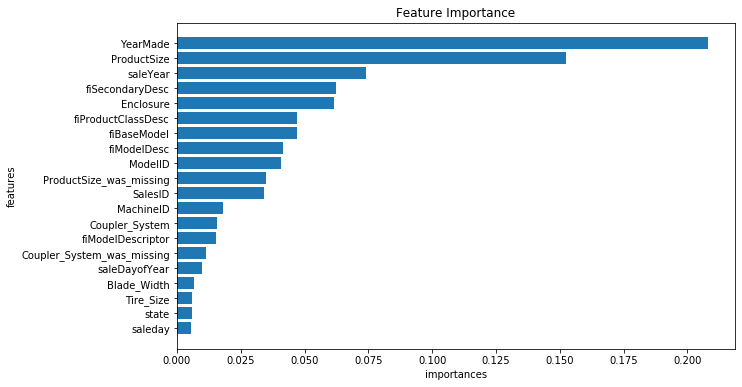

In [191]:
feature_importance(X_train.columns, ideal_model.feature_importances_)